# Introductory Capstone Notebook
##### This is the first notebook for the upcoming Capstone Project. 

In [1]:
import pandas as pd
import numpy as np

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Folium installed
Libraries imported.


In [3]:
CLIENT_ID = 'EZMIJ3D4IV1201BVAQUESXLTD3AKJ1TMZC2J3WPO3KWSKB3D' # your Foursquare ID
CLIENT_SECRET = 'ENRBQBLQTWNVOJXMOT4PNAKZWXOBGBVXLNC0AH2CN3XB1AR2' # your Foursquare Secret
ACCESS_TOKEN = 'SLT0C5YK15RAKJCCRJKWGZDL1TCO33EKVOIMEPL250WQ3WFJ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZMIJ3D4IV1201BVAQUESXLTD3AKJ1TMZC2J3WPO3KWSKB3D
CLIENT_SECRET:ENRBQBLQTWNVOJXMOT4PNAKZWXOBGBVXLNC0AH2CN3XB1AR2


### In the below cell, I am using the Capitol Building in Austin, Texas as the center point of the city. 

In [4]:
address = '1100 Congress Ave, Austin, TX'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

30.276485 -97.739768


### Next, we will find all of the music venues that are within a 25 mile radius. 

In [5]:
search_query = 'Music'
radius = 500
print(search_query + ' .... OK!')

Music .... OK!


In [6]:
url = 'https://api.foursquare.com/v2/venues/explore'
url

'https://api.foursquare.com/v2/venues/explore'

In [7]:
import json
from pprint import pprint

params = dict(
client_id=CLIENT_ID,
client_secret=CLIENT_SECRET,
v=VERSION,
ll='30.276485,-97.739768',
query='Music Venue',
limit=100
)
results = requests.get(url=url, params=params).json()
# pprint(results['response']['groups'][0])



    
for venue in results['response']['groups'][0]['items']: 
    pprint(venue['venue']['name'])  
    pprint(venue['venue']['id']) 
    pprint(venue['venue']['location']['formattedAddress']) 
    pprint(venue['venue']['location']['lat']) 
    pprint(venue['venue']['location']['lng']) 
    print('\n')

'The Mohawk'
'45f4fde8f964a52001441fe3'
['912 Red River St (at E 10th St.)', 'Austin, TX 78701', 'United States']
30.270000592044763
-97.7359316400037


'Scottish Rite Theatre'
'4b65efe6f964a5209d092be3'
['207 W 18th St (Lavaca)', 'Austin, TX 78701', 'United States']
30.279910059706587
-97.74063186245304


"Cheer Up Charlie's"
'53016e04498e2a3d3f703437'
['900 Red River St (at 9th St)', 'Austin, TX 78701', 'United States']
30.26959062736247
-97.73618683230653


'Empire Control Room'
'512ba6e51648d4cde4dd39b7'
['606 E 7th St (Red River)', 'Austin, TX 78701', 'United States']
30.267499086668955
-97.73615760645771


'The Townsend'
'54f12e4e498e53d73df2472b'
['718 Congress Ave Ste 100 (8th St)', 'Austin, TX 78701', 'United States']
30.269611
-97.742448


'Cactus Cafe'
'40b13b00f964a5205af71ee3'
['2247 Guadalupe Street (at 24th)', 'Austin, TX 78712', 'United States']
30.2864812
-97.7411482


"Stubb's Waller Creek Amphitheatre"
'5513b79d498e85e653f255ad'
['801 Red River St', 'Austin, TX 78701

In [8]:
venue_list = []

for venue in results['response']['groups'][0]['items']: 
    ven = dict()
    ven['name'] = venue['venue']['name']
    ven['id'] = venue['venue']['id']
    ven['address'] = venue['venue']['location']['formattedAddress']
    ven['latitude'] = venue['venue']['location']['lat']
    ven['longitude'] = venue['venue']['location']['lng']
    
    new_url = 'https://api.foursquare.com/v2/venues/{}'.format(venue['venue']['id'])
    new_results = requests.get(url=new_url, params=params).json()
    ven['rating'] = new_results['response']['venue'].get('rating', np.nan) 
    # note- we need to add ratings and capacity figures. How do I get ratings?
    venue_list.append(ven)
    
venue_list

[{'name': 'The Mohawk',
  'id': '45f4fde8f964a52001441fe3',
  'address': ['912 Red River St (at E 10th St.)',
   'Austin, TX 78701',
   'United States'],
  'latitude': 30.270000592044763,
  'longitude': -97.7359316400037,
  'rating': 8.5},
 {'name': 'Scottish Rite Theatre',
  'id': '4b65efe6f964a5209d092be3',
  'address': ['207 W 18th St (Lavaca)', 'Austin, TX 78701', 'United States'],
  'latitude': 30.279910059706587,
  'longitude': -97.74063186245304,
  'rating': 8.2},
 {'name': "Cheer Up Charlie's",
  'id': '53016e04498e2a3d3f703437',
  'address': ['900 Red River St (at 9th St)',
   'Austin, TX 78701',
   'United States'],
  'latitude': 30.26959062736247,
  'longitude': -97.73618683230653,
  'rating': 8.8},
 {'name': 'Empire Control Room',
  'id': '512ba6e51648d4cde4dd39b7',
  'address': ['606 E 7th St (Red River)', 'Austin, TX 78701', 'United States'],
  'latitude': 30.267499086668955,
  'longitude': -97.73615760645771,
  'rating': 8.2},
 {'name': 'The Townsend',
  'id': '54f12e4e4

In [9]:
# Turn the list of dictionaries into a dataframe

vdf = pd.DataFrame(venue_list)
vdf

,name,id,address,latitude,longitude,rating
0,The Mohawk,45f4fde8f964a52001441fe3,"[912 Red River St (at E 10th St.), Austin, TX ...",30.270001,-97.735932,8.5
1,Scottish Rite Theatre,4b65efe6f964a5209d092be3,"[207 W 18th St (Lavaca), Austin, TX 78701, Uni...",30.279910,-97.740632,8.2
2,Cheer Up Charlie's,53016e04498e2a3d3f703437,"[900 Red River St (at 9th St), Austin, TX 7870...",30.269591,-97.736187,8.8
3,Empire Control Room,512ba6e51648d4cde4dd39b7,"[606 E 7th St (Red River), Austin, TX 78701, U...",30.267499,-97.736158,8.2
4,The Townsend,54f12e4e498e53d73df2472b,"[718 Congress Ave Ste 100 (8th St), Austin, TX...",30.269611,-97.742448,8.2
...,...,...,...,...,...,...
95,green eggs and jams,58cc17806c682b5ee1652eaa,"[1649 E. Sixth Street, Austin, TX, United States]",30.261886,-97.725775,NaN
96,Flamingo Cantina,40b13b00f964a520a3f31ee3,"[515 E 6th St, Austin, TX 78701, United States]",30.266502,-97.737739,7.4
97,The Rumbler Lounge,4ba11454f964a520b39537e3,"[402 E 6th St (Trinity), Austin, TX 78701, Uni...",30.267305,-97.739021,NaN
98,Galaxy Room Backyard,4ba18aa0f964a52049bf37e3,"[508 E 6th St, Austin, TX 78701, United States]",30.267037,-97.737747,NaN


In [10]:
# Save locally to machine for manual adding of stuff
vdf.to_csv(r'/home/canderson102/CapstoneRepo/venue_dataframe.csv', index = False, header=True)

### Now that I have retrieved the relevant data from foursquare, I will have to interface with the venue information available at https://www.indieonthemove.com/ to get relevant genre and capacity information. In addition, where a venue did not show up in this database, I searched google to see if the venue was closed, or indeed open. Any information that could not be found was left blank, and has been filled in with a NaN value. Below, I return the new dataframe after manipulating the csv in Linux's LibreOffice Calc. 


In [39]:
# Now that I have manually added data for capacity and genre, bring back in the new csv
new_vdf = pd.read_csv(r'/home/canderson102/CapstoneRepo/new_venue_dataframe.csv')

#View the data to make sure that it has been correctly read in...
new_vdf

,name,id,address,latitude,longitude,rating,capacity,genre
0,The Mohawk,45f4fde8f964a52001441fe3,"['912 Red River St (at E 10th St.)', 'Austin, ...",30.270001,-97.735932,8.5,900.0,All
1,Scottish Rite Theatre,4b65efe6f964a5209d092be3,"['207 W 18th St (Lavaca)', 'Austin, TX 78701',...",30.279910,-97.740632,8.2,NaN,NaN
2,Cheer Up Charlie's,53016e04498e2a3d3f703437,"['900 Red River St (at 9th St)', 'Austin, TX 7...",30.269591,-97.736187,8.8,400.0,"All Genres, Avant-Garde, Dance, Electronic, Ex..."
3,Empire Control Room,512ba6e51648d4cde4dd39b7,"['606 E 7th St (Red River)', 'Austin, TX 78701...",30.267499,-97.736158,8.2,300.0,All
4,The Townsend,54f12e4e498e53d73df2472b,"['718 Congress Ave Ste 100 (8th St)', 'Austin,...",30.269611,-97.742448,8.2,NaN,"R&B, Jazz, Hip-Hop"
...,...,...,...,...,...,...,...,...
95,green eggs and jams,58cc17806c682b5ee1652eaa,"['1649 E. Sixth Street', 'Austin, TX', 'United...",30.261886,-97.725775,NaN,NaN,NaN
96,Flamingo Cantina,40b13b00f964a520a3f31ee3,"['515 E 6th St', 'Austin, TX 78701', 'United S...",30.266502,-97.737739,7.4,299.0,"Dub, Funk, Hip Hop, Jam Band, Reggae"
97,The Rumbler Lounge,4ba11454f964a520b39537e3,"['402 E 6th St (Trinity)', 'Austin, TX 78701',...",30.267305,-97.739021,NaN,NaN,NaN
98,Galaxy Room Backyard,4ba18aa0f964a52049bf37e3,"['508 E 6th St', 'Austin, TX 78701', 'United S...",30.267037,-97.737747,NaN,NaN,NaN


### and... Nice! Now, I will drop all of the venues that have incomplete data, as I will not be able to recommend them without more info. In addition, many of these incomplete rows represent *permanently* closed venues.

In [42]:
new_vdf.dropna(subset=['capacity', 'genre'], inplace = True)
new_vdf.reset_index(inplace = True)
new_vdf.drop(['level_0', 'index'], axis= 1, inplace = True)
new_vdf

,name,id,address,latitude,longitude,rating,capacity,genre
0,The Mohawk,45f4fde8f964a52001441fe3,"['912 Red River St (at E 10th St.)', 'Austin, ...",30.270001,-97.735932,8.5,900.0,All
1,Cheer Up Charlie's,53016e04498e2a3d3f703437,"['900 Red River St (at 9th St)', 'Austin, TX 7...",30.269591,-97.736187,8.8,400.0,"All Genres, Avant-Garde, Dance, Electronic, Ex..."
2,Empire Control Room,512ba6e51648d4cde4dd39b7,"['606 E 7th St (Red River)', 'Austin, TX 78701...",30.267499,-97.736158,8.2,300.0,All
3,Cactus Cafe,40b13b00f964a5205af71ee3,"['2247 Guadalupe Street (at 24th)', 'Austin, T...",30.286481,-97.741148,8.4,153.0,"Acoustic, Americana, Folk, Singer-Songwriter"
4,Stubb's Waller Creek Amphitheatre,5513b79d498e85e653f255ad,"['801 Red River St', 'Austin, TX 78701', 'Unit...",30.268786,-97.736132,7.9,1800.0,All
5,Antone's,568c8b18498edb7318117b20,"['305 E 5th St', 'Austin, TX 78701', 'United S...",30.266242,-97.740380,8.7,700.0,"Blues, All"
6,The Belmont,44fefd89f964a5209e381fe3,"['305 W 6th St (Lavaca St.)', 'Austin, TX 7870...",30.268767,-97.745534,8.0,1000.0,All
7,Stubb's Bar-B-Q,40fb0f00f964a520fc0a1fe3,"['801 Red River St (at E 8th St)', 'Austin, TX...",30.268516,-97.736256,8.1,1800.0,All
8,Shiner's Saloon,49b6d215f964a52013531fe3,"['422 Congress Ave Ste D (at 5th St)', 'Austin...",30.267126,-97.743322,8.1,250.0,"Acoustic, Americana, Country, Folk, Rock, Root..."
9,Speakeasy,40b13b00f964a520e8f31ee3,"['412 Congress Ave (btwn 4th & 5th St.)', 'Aus...",30.266669,-97.743427,7.9,400.0,"Acoustic, Blues, Classic Rock, Folk, R&B, Rock"


### Wonderful. Now that we have a properly adjusted dataframe containing all of the venue information, let's show them on a map of Austin! 

In [43]:
# coordinates of the capital
latitude = 30.276485 
longitude = -97.739768

venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around the Austin Capital


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Austin Capital',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# Now, add in all of the venues that we have data for!   
for lat, lng, label in zip(new_vdf['latitude'], new_vdf['longitude'], new_vdf['name']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        popup=folium.Popup(label, parse_html=True, max_width=100), #have to parse bc of special characters.
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)    
    
    
# display map
venues_map

### We can see a definite cluster south of the capitol, west of highway I 35. Zooming in, one can see a cluster of venues on the north-south bound street 'Red River', as well as several on the East-West bound street '6th'. Both of these streets are considered to be their own musical districts. There are other outlying venues east of I 35, as well as north along Guadalupe, near the University of Texas's campus. 

### Now, lets look at the distribution of capacities for austin venues, and see if we can divide them into 3 general bins. 

In [50]:
new_vdf.sort_values(by = 'capacity', ascending = True, inplace = True)
#new_vdf.reset_index(inplace = True)
new_vdf.drop(['index', 'level_0'], axis= 1, inplace = True)
new_vdf

,name,id,address,latitude,longitude,rating,capacity,genre
0,The Elephant Room,4101a680f964a520640b1fe3,"['315 Congress Ave (at 3rd St.)', 'Austin, TX ...",30.265672,-97.743575,8.7,30.0,Jazz
1,Stay Gold,54c31018498e78ed16522991,"['1910 E Cesar Chavez St', 'Austin, TX 78702',...",30.257108,-97.723672,8.4,92.0,"Blues, Funk, Jazz, R&B, Soul"
2,Mi Casa Cantina,4b5bc06cf964a520291429e3,"['503 E 6th St (Neches St)', 'Austin, TX 78701...",30.266760,-97.738223,NaN,100.0,All
3,Peckerheads,4ac82f84f964a520e3bb20e3,"['402 E 6th St (at Trinity)', 'Austin, TX 7870...",30.267168,-97.739049,6.2,100.0,All
4,Plush,40c7a480f964a520fb001fe3,"['617 Red River St (at 7th St.)', 'Austin, TX ...",30.267326,-97.736754,7.7,105.0,"Electronic, DJ"
5,Driskill Victorian Room,4ba452f8f964a520fe9538e3,"['604 Brazos St', 'Austin, TX 78701', 'United ...",30.267747,-97.741654,6.9,150.0,"Acoustic, Alt Country, Bluegrass, Blues, Count..."
6,Stubb's Indoors,568cc4ad498ec9bbe7a7e8a7,"['Austin, TX', 'United States']",30.268490,-97.736156,NaN,150.0,All
7,Cactus Cafe,40b13b00f964a5205af71ee3,"['2247 Guadalupe Street (at 24th)', 'Austin, T...",30.286481,-97.741148,8.4,153.0,"Acoustic, Americana, Folk, Singer-Songwriter"
8,Saxon Pub,40b13b00f964a520e2f31ee3,"['1320 S Lamar Blvd', 'Austin, TX 78704', 'Uni...",30.253410,-97.763269,8.5,168.0,All
9,Hotel Vegas,4ca6c35f931bb60c71fd96e2,"['1500 E 6th St (Onion St)', 'Austin, TX 78702...",30.263508,-97.727158,8.5,175.0,All


<AxesSubplot:>

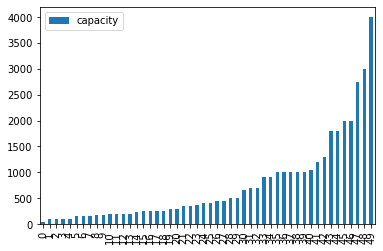

In [51]:
new_vdf.plot(kind = 'bar', y = 'capacity')

### Starting with the scoot in, which has a venue capacity over 1000, there is a clear set of venues that have large capacities and are usually reserved for touring bands. There is also a jump in capacity from Elysium (28) to Vulcan Gas Company (29), which looks like a clear place to mark the top end of the "small" bin. 

In [52]:
size_list = ['small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'large', 'large', 'large', 'large', 'large', 'large', 'large', 'large', 'large', 'large']
new_vdf['size'] = size_list
new_vdf

,name,id,address,latitude,longitude,rating,capacity,genre,size
0,The Elephant Room,4101a680f964a520640b1fe3,"['315 Congress Ave (at 3rd St.)', 'Austin, TX ...",30.265672,-97.743575,8.7,30.0,Jazz,small
1,Stay Gold,54c31018498e78ed16522991,"['1910 E Cesar Chavez St', 'Austin, TX 78702',...",30.257108,-97.723672,8.4,92.0,"Blues, Funk, Jazz, R&B, Soul",small
2,Mi Casa Cantina,4b5bc06cf964a520291429e3,"['503 E 6th St (Neches St)', 'Austin, TX 78701...",30.266760,-97.738223,NaN,100.0,All,small
3,Peckerheads,4ac82f84f964a520e3bb20e3,"['402 E 6th St (at Trinity)', 'Austin, TX 7870...",30.267168,-97.739049,6.2,100.0,All,small
4,Plush,40c7a480f964a520fb001fe3,"['617 Red River St (at 7th St.)', 'Austin, TX ...",30.267326,-97.736754,7.7,105.0,"Electronic, DJ",small
5,Driskill Victorian Room,4ba452f8f964a520fe9538e3,"['604 Brazos St', 'Austin, TX 78701', 'United ...",30.267747,-97.741654,6.9,150.0,"Acoustic, Alt Country, Bluegrass, Blues, Count...",small
6,Stubb's Indoors,568cc4ad498ec9bbe7a7e8a7,"['Austin, TX', 'United States']",30.268490,-97.736156,NaN,150.0,All,small
7,Cactus Cafe,40b13b00f964a5205af71ee3,"['2247 Guadalupe Street (at 24th)', 'Austin, T...",30.286481,-97.741148,8.4,153.0,"Acoustic, Americana, Folk, Singer-Songwriter",small
8,Saxon Pub,40b13b00f964a520e2f31ee3,"['1320 S Lamar Blvd', 'Austin, TX 78704', 'Uni...",30.253410,-97.763269,8.5,168.0,All,small
9,Hotel Vegas,4ca6c35f931bb60c71fd96e2,"['1500 E 6th St (Onion St)', 'Austin, TX 78702...",30.263508,-97.727158,8.5,175.0,All,small


### Each size venue corresponds to each of the three general sizes of acts that may come through a town. These are:

       1) Small: 
           Small local acts, small touring acts with little promotional support. 
       2) Medium: 
           Local bands with good draw, touring bands small-medium indie labels with decent promotional support.
       3) Large: 
           Major label acts.

### Similarly, for each of these sizes, the recommendation engine will be driven by a different set of parameters:

       1) Small:
           Promiximity Score and Genre.
       2) Medium:
           Ratings and Genre.
       3) Large:
           Capacity and Genre.

### Proximity Score measures how close a venue is to other venues of any size. Using the longitude and latitude, we can calculate the average distance of the three closest venues by way of the Haversine distance formula. I have installed the haversine package on my local machine, which is used below, to get the average distance of the three closest neighbors to the current venue. 

In [53]:
list_coords = list(zip(new_vdf['latitude'], new_vdf['longitude']))

In [54]:
import haversine
from haversine import haversine_vector, Unit
dist_list = haversine_vector(list_coords, list_coords, Unit.MILES, comb = True)
dist_list

array([[0.        , 1.32701846, 0.32814297, ..., 0.22144667, 0.51991126,
        0.21972364],
       [1.32701846, 0.        , 1.09489398, ..., 1.5169013 , 1.5236692 ,
        1.50483413],
       [0.32814297, 1.09489398, 0.        , ..., 0.54877106, 0.80397121,
        0.54784466],
       ...,
       [0.22144667, 1.5169013 , 0.54877106, ..., 0.        , 0.39387834,
        0.02058529],
       [0.51991126, 1.5236692 , 0.80397121, ..., 0.39387834, 0.        ,
        0.37614268],
       [0.21972364, 1.50483413, 0.54784466, ..., 0.02058529, 0.37614268,
        0.        ]])

In [55]:
ind_arr = np.argsort(dist_list, axis = 1)[:,1:4]
ind_arr 

array([[24, 15, 32],
       [40,  9, 10],
       [18, 30, 19],
       [30, 18, 38],
       [17, 29, 36],
       [26, 27, 16],
       [43, 44, 13],
       [23, 21, 45],
       [48, 49, 22],
       [10, 40, 12],
       [ 9, 40, 12],
       [37, 22, 47],
       [10,  9, 34],
       [29, 43,  6],
       [35, 46, 28],
       [24,  0,  5],
       [27, 26, 42],
       [ 4, 29, 36],
       [30,  2,  3],
       [ 2, 18, 30],
       [36, 29,  4],
       [45, 23,  7],
       [47, 49, 32],
       [ 7, 21, 45],
       [15,  0, 32],
       [34, 33, 44],
       [27, 16,  5],
       [26, 16,  5],
       [46, 14, 35],
       [ 4, 13, 36],
       [18,  2,  3],
       [38, 39, 42],
       [24, 15,  0],
       [34, 25, 44],
       [33, 25, 44],
       [14, 46, 28],
       [20, 29,  4],
       [32, 15, 24],
       [39, 42,  3],
       [42, 38,  3],
       [ 9, 10,  1],
       [ 5, 26, 27],
       [39, 38, 16],
       [ 6, 44, 13],
       [43,  6, 25],
       [21, 23,  7],
       [28, 14, 35],
       [22, 4

In [56]:
proximity_rating = []
 
for i in range(dist_list.shape[0]):
    prox_score = np.mean(dist_list[ind_arr[i][0]] + dist_list[ind_arr[i][1]] + dist_list[ind_arr[i][2]])
    proximity_rating.append(prox_score)

proximity_rating

[1.7053387500988395,
 2.7130494033530796,
 1.4288061083396866,
 1.4148546622059923,
 1.4953973245701304,
 1.4512489914189755,
 1.5357008684639295,
 5.4656559395938435,
 2.3375403588576384,
 2.6248289061477568,
 2.625322976164788,
 2.039438494917308,
 2.4164427213519746,
 1.5287524586361452,
 2.265638302856928,
 1.6176001458329592,
 1.4431037666796707,
 1.495237629477468,
 1.4169960268961537,
 1.4194816153305638,
 1.4952376294774679,
 4.92834992519769,
 2.0137259711515627,
 5.2594089995710025,
 1.7216052284651093,
 1.6495000364953978,
 1.469231828542598,
 1.4704970968076785,
 2.192136966308827,
 1.4955276089006606,
 1.4178913035769278,
 1.4146927837506718,
 1.657922991403866,
 1.6325060141792447,
 1.629969680668311,
 2.2766825425719124,
 1.4984065667737143,
 1.7053387500988395,
 1.4131945026301964,
 1.4129594479462426,
 3.140356113593735,
 1.4753598519344875,
 1.4228380084899768,
 1.5378265321106352,
 1.5770876418337667,
 4.916335677875319,
 2.207913042510698,
 2.0154186336491717,
 2.10

In [57]:
new_vdf['proximity score'] = proximity_rating
new_vdf

,name,id,address,latitude,longitude,rating,capacity,genre,size,proximity score
0,The Elephant Room,4101a680f964a520640b1fe3,"['315 Congress Ave (at 3rd St.)', 'Austin, TX ...",30.265672,-97.743575,8.7,30.0,Jazz,small,1.705339
1,Stay Gold,54c31018498e78ed16522991,"['1910 E Cesar Chavez St', 'Austin, TX 78702',...",30.257108,-97.723672,8.4,92.0,"Blues, Funk, Jazz, R&B, Soul",small,2.713049
2,Mi Casa Cantina,4b5bc06cf964a520291429e3,"['503 E 6th St (Neches St)', 'Austin, TX 78701...",30.266760,-97.738223,NaN,100.0,All,small,1.428806
3,Peckerheads,4ac82f84f964a520e3bb20e3,"['402 E 6th St (at Trinity)', 'Austin, TX 7870...",30.267168,-97.739049,6.2,100.0,All,small,1.414855
4,Plush,40c7a480f964a520fb001fe3,"['617 Red River St (at 7th St.)', 'Austin, TX ...",30.267326,-97.736754,7.7,105.0,"Electronic, DJ",small,1.495397
5,Driskill Victorian Room,4ba452f8f964a520fe9538e3,"['604 Brazos St', 'Austin, TX 78701', 'United ...",30.267747,-97.741654,6.9,150.0,"Acoustic, Alt Country, Bluegrass, Blues, Count...",small,1.451249
6,Stubb's Indoors,568cc4ad498ec9bbe7a7e8a7,"['Austin, TX', 'United States']",30.268490,-97.736156,NaN,150.0,All,small,1.535701
7,Cactus Cafe,40b13b00f964a5205af71ee3,"['2247 Guadalupe Street (at 24th)', 'Austin, T...",30.286481,-97.741148,8.4,153.0,"Acoustic, Americana, Folk, Singer-Songwriter",small,5.465656
8,Saxon Pub,40b13b00f964a520e2f31ee3,"['1320 S Lamar Blvd', 'Austin, TX 78704', 'Uni...",30.253410,-97.763269,8.5,168.0,All,small,2.337540
9,Hotel Vegas,4ca6c35f931bb60c71fd96e2,"['1500 E 6th St (Onion St)', 'Austin, TX 78702...",30.263508,-97.727158,8.5,175.0,All,small,2.624829


### Now that we have the proximity ratings of all of the venues, we can rank them by their proximity score. A lower score is best, because it means that the venue is closer to other venues. We will sort by prox store, in ascending order. All that we will need to do from here is return venues that match a given small band's genre. 

In [67]:
small_vdf = (new_vdf.loc[new_vdf['size'] == 'small']).sort_values(by = 'proximity score', ascending = True)
small_vdf

,name,id,address,latitude,longitude,rating,capacity,genre,size,proximity score
3,Peckerheads,4ac82f84f964a520e3bb20e3,"['402 E 6th St (at Trinity)', 'Austin, TX 7870...",30.267168,-97.739049,6.2,100.0,All,small,1.414855
18,Voodoo Room,52016d408bbdf1a6d233e3c2,"['419 E 6th St', 'Austin, TX 78701', 'United S...",30.266826,-97.738631,6.2,250.0,"Electronic, DJ",small,1.416996
19,Flamingo Cantina,40b13b00f964a520a3f31ee3,"['515 E 6th St', 'Austin, TX 78701', 'United S...",30.266502,-97.737739,7.4,299.0,"Dub, Funk, Hip Hop, Jam Band, Reggae",small,1.419482
2,Mi Casa Cantina,4b5bc06cf964a520291429e3,"['503 E 6th St (Neches St)', 'Austin, TX 78701...",30.266760,-97.738223,NaN,100.0,All,small,1.428806
16,Darwin's Pub,414e1d80f964a520e01c1fe3,"['223 E 6th St (at San Jacinto Boulevard)', 'A...",30.267328,-97.740522,6.9,250.0,"Blues, Rock",small,1.443104
5,Driskill Victorian Room,4ba452f8f964a520fe9538e3,"['604 Brazos St', 'Austin, TX 78701', 'United ...",30.267747,-97.741654,6.9,150.0,"Acoustic, Alt Country, Bluegrass, Blues, Count...",small,1.451249
26,The Parish,440fee99f964a520b2301fe3,"['214-C E 6th St (San Jacinto)', 'Austin, TX 7...",30.267753,-97.740745,7.4,450.0,All,small,1.469232
27,The Parish Underground,4d6ea141451c41bd39102845,"['214 E 6th St', 'Austin, TX 78701', 'United S...",30.267677,-97.740719,7.4,450.0,All,small,1.470497
20,Empire Control Room,512ba6e51648d4cde4dd39b7,"['606 E 7th St (Red River)', 'Austin, TX 78701...",30.267499,-97.736158,8.2,300.0,All,small,1.495238
17,Swan Dive,4ce72f260f196dcbcdb63cae,"['615 Red River St. (7th Street)', 'Austin, TX...",30.267199,-97.736779,6.3,250.0,All,small,1.495238


### Now, we will create a similar table for medium sized venues, and sort them by descending user experience (the ratings column).

In [69]:
medium_vdf = (new_vdf.loc[new_vdf['size'] == 'medium']).sort_values(by = 'rating', ascending = False)
medium_vdf

,name,id,address,latitude,longitude,rating,capacity,genre,size,proximity score
31,Antone's,568c8b18498edb7318117b20,"['305 E 5th St', 'Austin, TX 78701', 'United S...",30.266242,-97.740380,8.7,700.0,"Blues, All",medium,1.414693
32,Cedar Street Courtyard,40b13b00f964a5207af31ee3,"['208 W 4th St (Colorado & Lavaca)', 'Austin, ...",30.266829,-97.745313,8.5,700.0,All,medium,1.657923
34,The Mohawk,45f4fde8f964a52001441fe3,"['912 Red River St (at E 10th St.)', 'Austin, ...",30.270001,-97.735932,8.5,900.0,All,medium,1.629970
37,The Belmont,44fefd89f964a5209e381fe3,"['305 W 6th St (Lavaca St.)', 'Austin, TX 7870...",30.268767,-97.745534,8.0,1000.0,All,medium,1.705339
35,The Container Bar,4e29e18dd22d3f83c87def5b,"['90 Rainey St (Davis)', 'Austin, TX 78701', '...",30.260319,-97.738364,7.7,1000.0,"Electronic, DJ",medium,2.276683
38,Maggie Mae's Gibson Room,514158efe4b05078b2fb62e2,"['323 E 6th St Austin, TX 78701', 'Austin, TX ...",30.267009,-97.739654,7.3,1000.0,"Alternative, Blues, Rock",medium,1.413195
39,Maggie Mae's,40b13b00f964a520c5f31ee3,"['323 E 6th St (at Trinity)', 'Austin, TX 7870...",30.267099,-97.739762,6.9,1000.0,"Alternative, Blues, Rock",medium,1.412959
30,Vulcan Gas Company,5319373d498e20ab5c0d1da0,"['418 E 6th St (at Neches St)', 'Austin, TX 78...",30.266978,-97.738591,6.7,658.0,"All, DJ, Electronic",medium,1.417891
36,Empire Garage,51300d5c7e27eb71082d6d5a,"['604 E 7th St', 'Austin, TX 78701', 'United S...",30.267457,-97.736266,6.3,1000.0,All,medium,1.498407
33,Mohawk Outdoor,5c782de11ffe97002cd4b204,"['912 Red River St', 'Austin, TX 78701', 'Unit...",30.270127,-97.736247,NaN,900.0,All,medium,1.632506


### And now, we will do the same for large venues, and sort them by capacity.

In [71]:
large_vdf = (new_vdf.loc[new_vdf['size'] == 'large']).sort_values(by = 'capacity', ascending = False)
large_vdf

,name,id,address,latitude,longitude,rating,capacity,genre,size,proximity score
49,Austin City Hall,458c29a3f964a520f63f1fe3,"['301 W 2nd St', 'Austin, TX 78701', 'United S...",30.264999,-97.747174,7.1,4000.0,All,large,2.014236
48,Auditorium Shores at Lady Bird Lake,4a1f1b1ef964a520087c1fe3,"['800 W. Riverside Dr.', 'Austin, TX 78704', '...",30.259792,-97.749013,9.5,3000.0,All,large,2.103314
47,Austin City Limits Live,4c77cbe5947ca1cd90694837,"['310 Willie Nelson Blvd (at Guadalupe St)', '...",30.265288,-97.747260,9.3,2750.0,All,large,2.015419
45,Spider House Patio Bar & Cafe,40b3de00f964a5200f001fe3,"['2908 Fruth St (at W 29th St)', 'Austin, TX 7...",30.295479,-97.741725,8.5,2000.0,All,large,4.916336
46,Banger's Sausage House & Beer Garden,4feb8f93e4b0a19839c43cd2,"['79 & 81 Rainey St (btwn Davis & River St.)',...",30.258951,-97.738485,9.1,2000.0,All,large,2.207913
43,Stubb's Bar-B-Q,40fb0f00f964a520fc0a1fe3,"['801 Red River St (at E 8th St)', 'Austin, TX...",30.268516,-97.736256,8.1,1800.0,All,large,1.537827
44,Stubb's Waller Creek Amphitheatre,5513b79d498e85e653f255ad,"['801 Red River St', 'Austin, TX 78701', 'Unit...",30.268786,-97.736132,7.9,1800.0,All,large,1.577088
42,The Blind Pig Pub,40b13b00f964a52069f31ee3,['317 E 6th St (btw San Jacinto Boulevard & Tr...,30.267140,-97.739826,6.9,1300.0,"Classic Rock, Country, Pop, Rock, Top 40",large,1.422838
41,Paramount Theatre,44b75631f964a5206d351fe3,"['713 Congress Ave (7th St.)', 'Austin, TX 787...",30.269457,-97.742077,8.9,1200.0,All,large,1.475360
40,Scoot Inn,441d4341f964a52060311fe3,"['1308 E 4th St (Navasota)', 'Austin, TX 78702...",30.262101,-97.729466,7.7,1050.0,All,large,3.140356


In [78]:
### Let's look at a map and see if there is any correlation between proximity score and location.

new_vdf['marker_color'] = pd.cut(new_vdf['proximity score'], bins=6, 
                              labels=['purple', 'darkred', 'red', 'lightred', 'orange', 'yellow'])
    
# coordinates of the capital
latitude = 30.276485 
longitude = -97.739768

venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around the Austin Capital


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Austin Capital',
    fill=True,
    color='blue',
    fill_color='blue',
    fill_opacity=0.6
    ).add_to(venues_map)

# Now, add in all of the venues that we have data for!   
for lat, lng, label, marker in zip(new_vdf['latitude'], new_vdf['longitude'], new_vdf['name'], new_vdf['marker_color']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        popup=folium.Popup(label, parse_html=True, max_width=100), #have to parse bc of special characters.
        fill=True,
        color=marker,
        fill_color = marker,
        fill_opacity=0.6
    ).add_to(venues_map)    
    
    
# display map
venues_map    



# [‘red’, ‘blue’, ‘green’, ‘purple’, ‘orange’, ‘darkred’,
# ’lightred’, ‘beige’, ‘darkblue’, ‘darkgreen’, ‘cadetblue’, 
#  ‘darkpurple’, ‘white’, ‘pink’, ‘lightblue’, ‘lightgreen’, 
#  ‘gray’, ‘black’, ‘lightgray’]



### The map above shows the proximity ratings of all of the venues. We can see a relationship between proximity score and geographical location, with the highest score cluster being near the red river and 6th street districts, other south of town venues in the dark red category, and the northern venues in the yellow category. 

### Now that we have sorted the three categories by our parameters, it is time to ask for input from the user. We will prompt them for three things: the size of their band, based on some basic parameters. Their genre, from a predetermined list, and the preferred minimum rating of the venue list they will receive. 

In [91]:
genre_list = []
for genreset in new_vdf['genre']:
    curList = genreset.split(', ')
    genre_list.extend(curList)
genre_list.remove('All')
genre_set = set(genre_list)
genre_set.remove('All')
#lets look at all genres and see if there is any cleaning up to do. 
genre_set

{'Acoustic',
 'All Genres',
 'Alt Country',
 'Alternative',
 'Americana',
 'Avant-Garde',
 'Bluegrass',
 'Blues',
 'Classic Rock',
 'Country',
 'DJ',
 'Dance',
 'Dub',
 'Electronic',
 'Experimental',
 'Folk',
 'Folk Rock',
 'Funk',
 'Gothic',
 'Hip Hop',
 'Honky Tonk',
 'Indie',
 'Industrial',
 'Jam Band',
 'Jazz',
 'Noise',
 'Pop',
 'Psychedelic ',
 'Punk',
 'R&B',
 'Reggae ',
 'Rock',
 'Rock ',
 'Rockabilly',
 'Roots Music',
 'Singer-Songwriter',
 'Singer-Songwriter ',
 'Soul',
 'Southern Rock ',
 'Top 40'}

In [94]:
#Some stuff to clean out for sure, let's do it
genre_set.remove('All Genres')
genre_set.remove('Rock ')
genre_set.remove('Singer-Songwriter ')
genre_set

{'Acoustic',
 'Alt Country',
 'Alternative',
 'Americana',
 'Avant-Garde',
 'Bluegrass',
 'Blues',
 'Classic Rock',
 'Country',
 'DJ',
 'Dance',
 'Dub',
 'Electronic',
 'Experimental',
 'Folk',
 'Folk Rock',
 'Funk',
 'Gothic',
 'Hip Hop',
 'Honky Tonk',
 'Indie',
 'Industrial',
 'Jam Band',
 'Jazz',
 'Noise',
 'Pop',
 'Psychedelic ',
 'Punk',
 'R&B',
 'Reggae ',
 'Rock',
 'Rockabilly',
 'Roots Music',
 'Singer-Songwriter',
 'Soul',
 'Southern Rock ',
 'Top 40'}

In [96]:
#Let's edit all of the genres that have a space at the end, and also add an option for 'other' in case a band genre is not listed.
genre_set.remove('Psychedelic ')
genre_set.remove('Reggae ')
genre_set.remove('Southern Rock ')
genre_set.add('Psychedelic')
genre_set.add('Reggae')
genre_set.add('Southern Rock')
genre_set.add('Other')


KeyError: 'Psychedelic '

In [118]:
genre_set

{'Acoustic',
 'Alt Country',
 'Alternative',
 'Americana',
 'Avant-Garde',
 'Bluegrass',
 'Blues',
 'Classic Rock',
 'Country',
 'DJ',
 'Dance',
 'Dub',
 'Electronic',
 'Experimental',
 'Folk',
 'Folk Rock',
 'Funk',
 'Gothic',
 'Hip Hop',
 'Honky Tonk',
 'Indie',
 'Industrial',
 'Jam Band',
 'Jazz',
 'Noise',
 'Other',
 'Pop',
 'Psychedelic',
 'Punk',
 'R&B',
 'Reggae',
 'Rock',
 'Rockabilly',
 'Roots Music',
 'Singer-Songwriter',
 'Soul',
 'Southern Rock',
 'Top 40'}

In [99]:
# list of relevant variables for user interaction. 

# large_vdf
# medium_vdf
# small_vdf
# genre_set

In [170]:
print(f'List of venue genres: {genre_set}')
print('\n')
artist_genre = input('What genre is your act? Choose from the list above: ')
print('\nsmall act definition- local act or a touring independent act with limited/no promotional budget')
print('medium act definition- reputable local act or a signed touring act with decent promotional budget')
print('large act definition- major label touring acts\n')
artist_size = input('What size act are you?: ')
artist_rating = float(input('Specify minimum required venue rating, out of 10: '))

List of venue genres: {'Experimental', 'Rockabilly', 'Avant-Garde', 'Dance', 'Pop', 'Psychedelic', 'Acoustic', 'Folk Rock', 'Blues', 'Country', 'Jazz', 'Hip Hop', 'Other', 'Electronic', 'R&B', 'Americana', 'Dub', 'Reggae', 'Bluegrass', 'Singer-Songwriter', 'Funk', 'Southern Rock', 'Classic Rock', 'Rock', 'Top 40', 'Folk', 'Roots Music', 'Alt Country', 'Jam Band', 'DJ', 'Alternative', 'Noise', 'Indie', 'Soul', 'Punk', 'Industrial', 'Gothic', 'Honky Tonk'}


What genre is your act? Choose from the list above: Avant-Garde

small act definition- local act or a touring independent act with limited/no promotional budget
medium act definition- reputable local act or a signed touring act with decent promotional budget
large act definition- major label touring acts

What size act are you?: medium
Specify minimum required venue rating, out of 10: 8


In [171]:
if artist_size.lower().strip() == 'small':
    new_df = small_vdf[[artist_genre in i.split(', ') or i.lower() == 'all' for i in small_vdf['genre']]]
    new_df = new_df[artist_rating <= new_vdf['rating']]
    new_df.sort_values(by='proximity score', ascending=True, inplace=True)
    if new_df.empty:
        print('No venues found. Try lowering your required venue rating.')
    else:
        print(f'{new_df.shape[0]} venue(s) found! Listed in order of recommendation')
        print(new_df[['name', 'rating']])
        
elif artist_size.lower().strip() == 'medium':
    new_df = medium_vdf[[artist_genre in i.split(', ') or i.lower() == 'all' for i in medium_vdf['genre']]]
    new_df = new_df[artist_rating <= new_vdf['rating']]
    new_df.sort_values(by='rating', ascending=False, inplace=True)
    if new_df.empty:
        print('No venues found. Try lowering your required venue rating.')
    else:
        print(f'{new_df.shape[0]} venue(s) found! Listed in order of recommendation')
        print(new_df[['name', 'rating']])
        
elif artist_size.lower().strip() == 'large':
    new_df = large_vdf[[artist_genre in i.split(', ') or i.lower() == 'all' for i in large_vdf['genre']]]
    new_df = new_df[artist_rating <= new_vdf['rating']]
    new_df.sort_values(by='capacity', ascending=False, inplace=True)
    if new_df.empty:
        print('No venues found. Try lowering your required venue rating.')
    else:
        print(f'{new_df.shape[0]} venue(s) found! Listed in order of recommendation')
        print(new_df[['name', 'rating']])

3 venue(s) found! Listed in order of recommendation
                      name  rating
32  Cedar Street Courtyard     8.5
34              The Mohawk     8.5
37             The Belmont     8.0


<ipython-input-171-1315ee6996b4>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[artist_rating <= new_vdf['rating']]


In [174]:
# Create a map of the matching results! 
latitude = 30.276485 
longitude = -97.739768
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around the Austin Capital

# Now, add in all of the venues that we have data for!   
for lat, lng, label in zip(new_df['latitude'], new_df['longitude'], new_df['name']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        popup=folium.Popup(label, parse_html=True, max_width=100), #have to parse bc of special characters.
        fill=True,
        color='green',
        fill_color = 'green',
        fill_opacity=0.6
    ).add_to(venues_map)    
    
    
# display map
venues_map    